In [ ]:
from keras.preprocessing.image import ImageDataGenerator
from keras.layers import Dense, Input, Dropout, GlobalAveragePooling2D, Flatten, Conv2D, BatchNormalization, Activation, MaxPooling2D
from keras.models import Model, Sequential
from keras.optimizers import Adam
from keras.callbacks import ModelCheckpoint
import matplotlib.pyplot as plt

In [ ]:
dir = "/content/drive/MyDrive/images/"

In [ ]:
# number of images to feed into the NN for every batch
batch_size = 128

datagen_train = ImageDataGenerator()
datagen_validation = ImageDataGenerator()

train_generator = datagen_train.flow_from_directory(dir + "train",
                                                    target_size=(48,48),
                                                    color_mode="grayscale",
                                                    batch_size=batch_size,
                                                    class_mode='categorical',
                                                    shuffle=True)

validation_generator = datagen_validation.flow_from_directory(dir + "validation",
                                                    target_size=(48,48),
                                                    color_mode="grayscale",
                                                    batch_size=batch_size,
                                                    class_mode='categorical',
                                                    shuffle=False)

Found 28821 images belonging to 7 classes.
Found 7066 images belonging to 7 classes.


In [ ]:
nb_classes = 7

model = Sequential()

model.add(Conv2D(64,(3,3), padding='same', input_shape=(48, 48,1)))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(128,(5,5), padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(512,(3,3), padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(512,(3,3), padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Flatten())

model.add(Dense(256))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.25))

model.add(Dense(512))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.25))

model.add(Dense(nb_classes, activation='softmax'))

opt = Adam(lr=0.0001)
model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])

In [6]:
checkpoint_filepath = "/content/drive/MyDrive/Model/kaggle/1"
checkpoint = ModelCheckpoint(filepath=checkpoint_filepath,
    save_weights_only=False,
    monitor='val_accuracy',
    mode='max',
    save_best_only=True)
callbacks_list = [checkpoint]

history = model.fit_generator(generator=train_generator,
                                steps_per_epoch=train_generator.n//train_generator.batch_size,
                                epochs=60,
                                validation_data = validation_generator,
                                validation_steps = validation_generator.n//validation_generator.batch_size,
                                callbacks=callbacks_list
                                )

/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/engine/training.py:1844: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/60
225/225 [==============================] - 13446s 60s/step - loss: 2.1665 - accuracy: 0.1944 - val_loss: 1.7115 - val_accuracy: 0.3195
INFO:tensorflow:Assets written to: /content/drive/MyDrive/Model/kaggle/1/assets
Epoch 2/60
225/225 [==============================] - 39s 171ms/step - loss: 1.8687 - accuracy: 0.2754 - val_loss: 1.7072 - val_accuracy: 0.3199
INFO:tensorflow:Assets written to: /content/drive/MyDrive/Model/kaggle/1/assets
Epoch 3/60
225/225 [==============================] - 38s 167ms/step - loss: 1.7603 - accuracy: 0.3272 - val_loss: 1.6361 - val_accuracy: 0.3656
INFO:tensorflow:Assets written to: /content/drive/MyDrive/Model/kaggle/1/assets
Epoch 4/60
225/225 [==============================] - 38s 168ms/step - loss: 1.6714 - accuracy: 0.3579 - val_loss: 1.6408 - val_accuracy: 0.3841
INFO:tensorflow:Assets written to: /content/drive/MyDrive/Model/kaggle/1/assets
Epoch 5/60
225/225 [==============================] - 38s 168ms/step - loss: 1.6153 - accuracy: 0.3

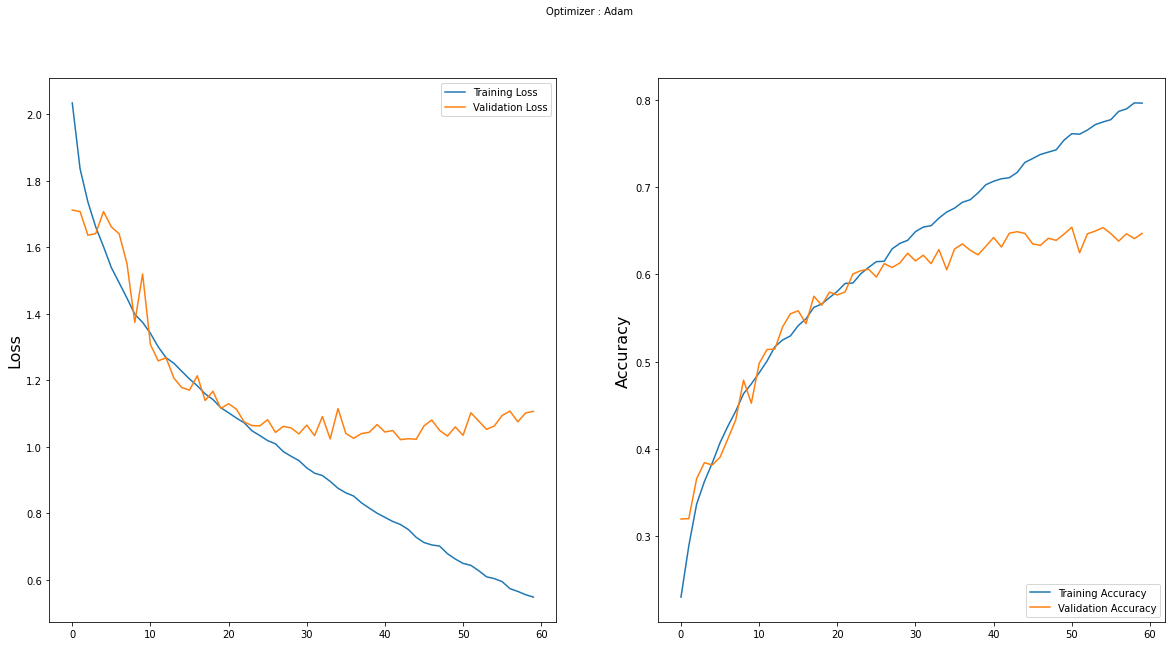

In [8]:
plt.figure(figsize=(20,10))
plt.subplot(1, 2, 1)
plt.suptitle('Optimizer : Adam', fontsize=10)
plt.ylabel('Loss', fontsize=16)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend(loc='upper right')

plt.subplot(1, 2, 2)
plt.ylabel('Accuracy', fontsize=16)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.legend(loc='lower right')
plt.show()

### by seeing graphs looks it overfits and also on live tests it did not give satisfactory results.